# Add imports

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Hyperparameters


In [3]:
num_classes = 9
batch_size = 32
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 3)
epochs = 50

# Create a Sequential model

In [4]:
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#### Note that the last Dense layer has 'num_classes' units and a 'softmax' activation function, 
#### which is appropriate for multiclass classification.


In [5]:
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Data augmentation


### Augmentation for test data

In [15]:
import os

# function to print number of images per category
def print_images_per_category(directory):
    for category in sorted(os.listdir(directory)):
        category_dir = os.path.join(directory, category)
        num_images = len(os.listdir(category_dir))
        print(f"Category: {category}, Number of Images: {num_images}")


### Generator for test and train data

In [16]:

test_datagen = ImageDataGenerator(rescale=1./255)

# Directories
test_dir = 'dataset/test/'


test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical')

# Print number of images per category
print_images_per_category(test_dir)

# print class labels for both training and test set
print("Class labels for test set: ", test_set.class_indices)


Found 663 images belonging to 9 classes.
Category: black, Number of Images: 100
Category: blue, Number of Images: 100
Category: brown, Number of Images: 40
Category: green, Number of Images: 35
Category: pink, Number of Images: 100
Category: red, Number of Images: 100
Category: silver, Number of Images: 40
Category: white, Number of Images: 49
Category: yellow, Number of Images: 99
Class labels for test set:  {'black': 0, 'blue': 1, 'brown': 2, 'green': 3, 'pink': 4, 'red': 5, 'silver': 6, 'white': 7, 'yellow': 8}


In [17]:
# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Creating generators
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical')

train_dir = 'dataset/train/'
print_images_per_category(train_dir)
print("Class labels for training set: ", training_set.class_indices)


Found 1472 images belonging to 9 classes.
Category: black, Number of Images: 179
Category: blue, Number of Images: 183
Category: brown, Number of Images: 130
Category: green, Number of Images: 129
Category: pink, Number of Images: 199
Category: red, Number of Images: 195
Category: silver, Number of Images: 135
Category: white, Number of Images: 133
Category: yellow, Number of Images: 195
Class labels for training set:  {'black': 0, 'blue': 1, 'brown': 2, 'green': 3, 'pink': 4, 'red': 5, 'silver': 6, 'white': 7, 'yellow': 8}


# TensorBoard


In [18]:
tensorboard = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=False)

[]

### Summary of the model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

### Preview images from the train dataset


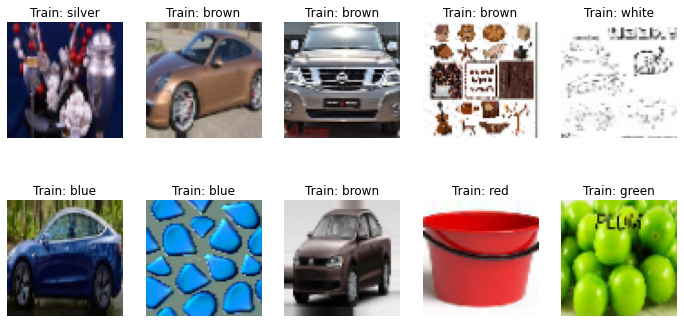

In [23]:
train_images, train_labels = next(training_set)
train_class_names = list(training_set.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(f"Train: {train_class_names[np.argmax(train_labels[i])]}")
    plt.axis('off')
plt.show()


### Train Data

In [8]:
# Training
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.samples // batch_size,
    callbacks=[tensorboard])

Epoch 1/50
29/46 [=================>............] - ETA: 5s - loss: 2.0982 - accuracy: 0.2004

c:\Users\muhri\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 24s 516ms/step - loss: 1.8774 - accuracy: 0.2921 - val_loss: 1.0181 - val_accuracy: 0.6016
Epoch 2/50
46/46 [==============================] - 14s 307ms/step - loss: 1.3215 - accuracy: 0.5414 - val_loss: 0.8306 - val_accuracy: 0.7484
Epoch 3/50
46/46 [==============================] - 14s 304ms/step - loss: 1.0823 - accuracy: 0.6658 - val_loss: 0.7460 - val_accuracy: 0.7375
Epoch 4/50
46/46 [==============================] - 14s 302ms/step - loss: 0.9894 - accuracy: 0.6902 - val_loss: 0.6291 - val_accuracy: 0.8094
Epoch 5/50
46/46 [==============================] - 14s 302ms/step - loss: 0.9414 - accuracy: 0.6984 - val_loss: 0.5713 - val_accuracy: 0.8000
Epoch 6/50
46/46 [==============================] - 14s 304ms/step - loss: 0.8683 - accuracy: 0.7418 - val_loss: 0.5155 - val_accuracy: 0.8297
Epoch 7/50
46/46 [==============================] - 14s 301ms/step - loss: 0.8733 - accuracy: 0.7439 - val_loss: 0.5646 - val_accuracy: 0.7922
Epoch 8/50

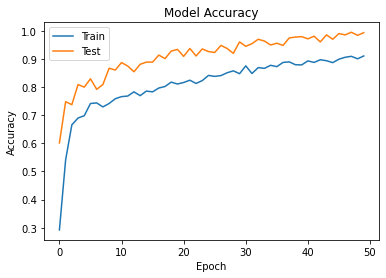

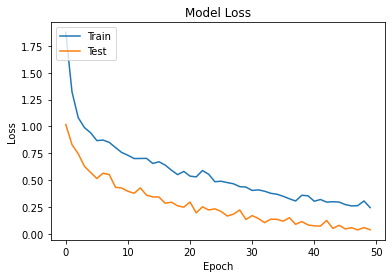

In [9]:

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Preview images after training

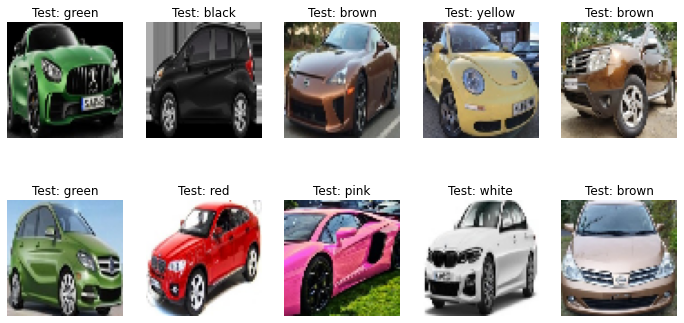

In [24]:
test_images, test_labels = next(test_set)
test_class_names = list(test_set.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Test: {test_class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
plt.show()


## Export model to H5

In [10]:
# Save the model
model.save('color_model.h5')


### Export to TF Lite

In [11]:

# Load the model
model = tf.keras.models.load_model('color_model.h5')

# Convert the model to tflite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the tflite model to a file
with open('color_model.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\muhri\AppData\Local\Temp\tmppcwo41ok\assets


INFO:tensorflow:Assets written to: C:\Users\muhri\AppData\Local\Temp\tmppcwo41ok\assets
